Implementation of Random Forest Algorithm on Breast Cancer Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset

data=load_breast_cancer()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

#Split the data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

#Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Random Forest- Accuracy: 0.9649122807017544, ROC AUC:0.9942679331804781, F1 Score:0.9722222222222222
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



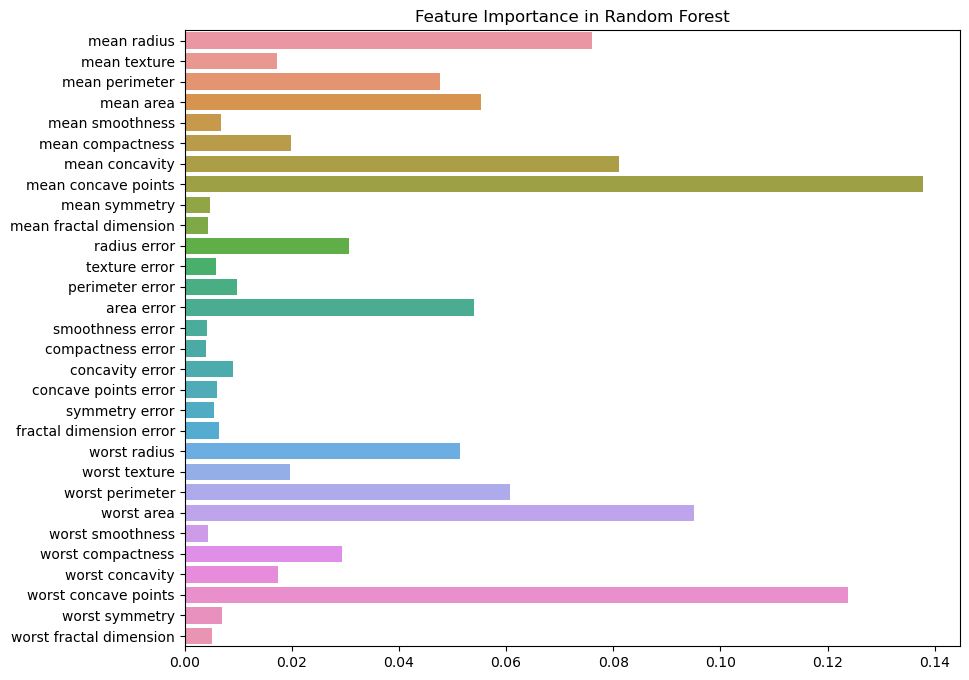

In [5]:
#Initalize the RandomForest Algorithm

rf_model=RandomForestClassifier(n_estimators=25, random_state=42)
rf_model.fit(X_train,y_train)

#Make predictions on the test dataset
y_pred=rf_model.predict(X_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1])
f1=f1_score(y_test,y_pred)

print(f'Random Forest- Accuracy: {accuracy}, ROC AUC:{roc_auc}, F1 Score:{f1}')
print(classification_report(y_test,y_pred))

#Plot the feature Importance
plt.figure(figsize=(10,8))
sns.barplot(x=rf_model.feature_importances_,y=data.feature_names)
plt.title('Feature Importance in Random Forest')
plt.show()